In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
data_dir=pathlib.Path(f'{PATH_TO_TRANING_DIRECTORY}')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

4370


In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  color_mode= "grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4370 files belonging to 2 classes.
Using 3496 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  color_mode= 'grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4370 files belonging to 2 classes.
Using 874 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['no_tumor', 'tumor']


In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 1)
(32,)


In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  1)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [13]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(
    1./255, input_shape=(img_height, img_width, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 1)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)       

In [93]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
110/110 [==============================] - 62s 561ms/step - loss: 0.3899 - accuracy: 0.8132 - val_loss: 0.2039 - val_accuracy: 0.9233
Epoch 2/30
110/110 [==============================] - 61s 557ms/step - loss: 0.2485 - accuracy: 0.9056 - val_loss: 0.1518 - val_accuracy: 0.9542
Epoch 3/30
110/110 [==============================] - 63s 571ms/step - loss: 0.1771 - accuracy: 0.9374 - val_loss: 0.2190 - val_accuracy: 0.9256
Epoch 4/30
110/110 [==============================] - 61s 554ms/step - loss: 0.1645 - accuracy: 0.9477 - val_loss: 0.2840 - val_accuracy: 0.8787
Epoch 5/30
110/110 [==============================] - 61s 558ms/step - loss: 0.1609 - accuracy: 0.9428 - val_loss: 0.1686 - val_accuracy: 0.9336
Epoch 6/30
110/110 [==============================] - 62s 562ms/step - loss: 0.1398 - accuracy: 0.9497 - val_loss: 0.2383 - val_accuracy: 0.8959
Epoch 7/30
110/110 [==============================] - 61s 553ms/step - loss: 0.1482 - accuracy: 0.9457 - val_loss: 0.5511 - val_ac

In [54]:
filepath=pathlib.Path('aimodel.h5')
tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format='h5',
    signatures=None,
    options=None,
)

In [5]:
filepath=pathlib.Path('aimodel.h5')
model=tf.keras.models.load_model(filepath, custom_objects=None, compile=True, options=None)

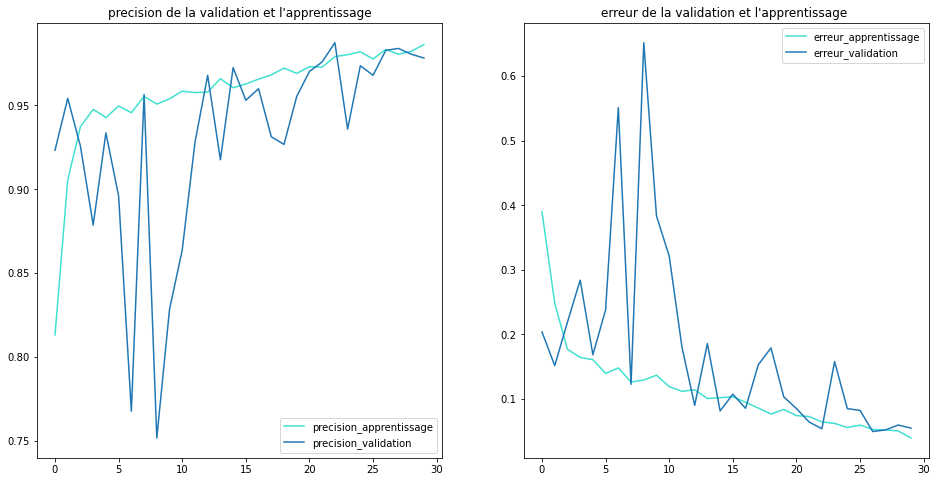

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='precision_apprentissage',color='turquoise')
plt.plot(epochs_range, val_acc, label='precision_validation')
plt.legend(loc='lower right')
plt.title("precision de la validation et l'apprentissage")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='erreur_apprentissage',color='turquoise')
plt.plot(epochs_range, val_loss, label='erreur_validation')
plt.legend(loc='upper right')
plt.title("erreur de la validation et l'apprentissage ")
plt.show()

In [111]:
path = pathlib.Path(f"{PATH_TO_TESTING_DIRECTORY}/Testing/image(96).jpg")
img = tf.keras.preprocessing.image.load_img(
    path, target_size=(img_height, img_width),color_mode='grayscale'
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Cette image appartient a la  classe {} avec un pourcentage  {:.2f} ."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Cette image appartient a la  classe tumor avec un pourcentage  89.75 .
